In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
inputs=[]
outputs=[]
dataSize = 5000
for i in range(dataSize):
        x = random.uniform(1, 10)
        inputs.append([x])
        outputs.append([math.log(x, 10)])
trainingSet = np.array(inputs[:math.floor(len(inputs)*0.8)])
trainingLabels = np.array(outputs[:math.floor(len(outputs)*0.8)])
testingSet = np.array(inputs[math.floor(len(inputs)*0.8):])
testingLabels = np.array(outputs[math.floor(len(outputs)*0.8):])

In [3]:
model = Sequential()
model.add(Dense(2, input_shape=(1,), kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error']) 
history = model.fit(trainingSet, trainingLabels, epochs=20, batch_size=5, verbose=1)

Epoch 1/20
800/800 [==============================] - 1s 647us/step - loss: 0.1266 - mean_squared_error: 0.1266
Epoch 2/20
800/800 [==============================] - 1s 633us/step - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 3/20
800/800 [==============================] - 1s 646us/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 4/20
800/800 [==============================] - 1s 668us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 5/20
800/800 [==============================] - 1s 714us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 6/20
800/800 [==============================] - 1s 630us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 7/20
800/800 [==============================] - 0s 590us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 8/20
800/800 [==============================] - 1s 652us/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 9/20
800/800 [==============================] - 1s 692us/step - loss: 7.8392e-04 - mean_squared_er

In [ ]:
test_results = model.evaluate(testingSet, testingLabels, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

### Test results - Loss: 2.934691474365536e-05

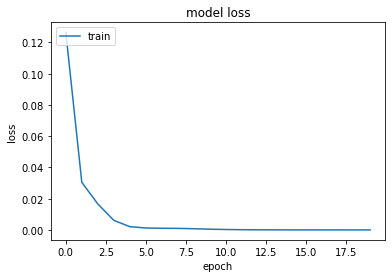

In [7]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

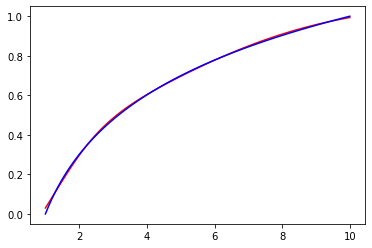

In [8]:
x = np.linspace(1,10,100)
ypredict = (model.predict(x))
y = np.log10(x)
plt.plot(x,ypredict, 'r', ls = '-')
plt.plot(x,y, 'b', ls = '-')
plt.show()